# Finding Supernova Neutrinos

To date we have only managed to detect the neutrinos from one supernova, which arrived at Earth on the 23rd February 1987 and is known by the snappy name SN1987A. In this project you will investigate the feasibility of identifying supernova neutrino events in a new type of detector a liquid argon time-projection chamber. These detectors give incredibly high-resolution 'images' of the charged-particle tracks produced when a neutrino interacts in the detector.

The data for this mini-project comes in the form of the following files:

| File | Description |
| ----------- | ----------- |
| larImages.npy | A numpy array of 10,000 100x100 pixel images |
| meta.npy | The meta information about the particles in the image |


The images show the energy deposited in the liquid argon detector in a small slice of space and time. The meta information contains the following 64 numbers  for each image. The [PDG code](https://pdg.lbl.gov/2019/reviews/rpp2019-rev-monte-carlo-numbering.pdf) is a number which identifies the particle type (e.g electron=11, electron-neutrino=12, etc.)

| Column | Description |
| ----------- | ----------- |
| 0 | Row number |
| 1 | Neutrino Energy (MeV) |
| 2 | Initial state particles (always 2) |
| 3 | Final state particles (varies) |
| 4-8 | Initial Particle 1: PDG code, Total Energy (MeV), $p_x$, $p_y$, $p_z$ | 
| 9-13 | Initial Particle 2: PDG code, Total Energy (MeV), $p_x$, $p_y$, $p_z$ |
| 14-18 | Final Particle 1: PDG code, Total Energy (MeV), $p_x$, $p_y$, $p_z$ | 
| 19-23 | Final Particle 2: PDG code, Total Energy (MeV), $p_x$, $p_y$, $p_z$ |
| $\vdots$ | Final Particle N: PDG code, Total Energy (MeV), $p_x$, $p_y$, $p_z$ |
| 59-63 | Final Particle 10: PDG code, Total Energy (MeV), $p_x$, $p_y$, $p_z$ |

## Machine learning tasks
1. Write a method to simulate electronic noise in the detector. The electronic noise is expected to follow a normal distribution.
2. Develop a machine learning classifier that can successfully classify 'clean' simulated neutrinos from 'empty' slices with some amount of 'electronic noise', how does your machine learning algorithm perform at differing noise levels?
3. Test your machine learning classifier on simulated neutrinos overlaid with noise, what level of additional noise starts to impact your machine learning algorithm

### Potential extensions
1. Write a method to generate noise in the 100x100 pixel images to simulate radioactive noise. This noise should be in the form of randomly placed Gaussian 'blobs' with appropriate energy. Repeat the above tests with radioactive noise. Is radioactive noise more or less of a problem than electronic noise? 
2. Write a machine learning algorithm that can determine either the electron energy or (even better) the neutrino energy. What is the best energy resolution that can be achieved by such an algorithm?
3. Write a machine learning algorithm to effectively denoise either the electronic noise or radioactive noise datasets
4. Write a machine learning algorithm to determin the number of final state particles in the image



In [23]:
import numpy as np
import matplotlib.pyplot as plt 

images=np.load('larImages.npy') #Load the l
meta=np.load('meta.npy')

print("images.shape",images.shape)
print("meta.shape",meta.shape)

images.shape (10000, 100, 100)
meta.shape (10000, 64)


In [24]:
print("Row",int(meta[0][0]),"corresponds to a neutrino of",meta[0][1], "MeV and produced",int(meta[0][3]),"final state particles")

Row 0 corresponds to a neutrino of 21.2005 MeV and produced 6 final state particles


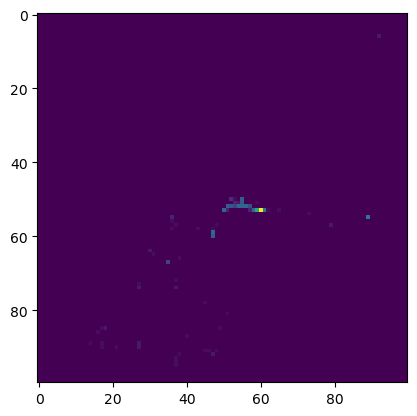

In [25]:
plt.figure()
plt.imshow(images[0])
plt.show()

## Task 1: Simulating electronic noise in the detector


The electronic noise in the liquid argon time-projection chamber is expected to follow a normal distribution. To model this, we'll use the properties of the Gaussian distribution to generate random noise values. These values will then be added to each pixel in our image dataset, giving a realistic representation of actual detector conditions.

-----

Background:

In statistics, a normal distribution or Gaussian distribution is a type of continuous probability distribution for a real-valued random variable. 


The probability density for the Gaussian distribution is:

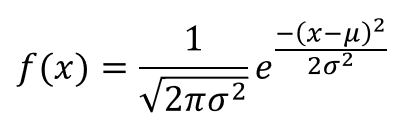

(Image via thatascience.com)

where $ \mu $ is the mean and the standard deviation. The square of the standard deviation, $ \sigma^2 $ , is called the variance.

---

numpy.random.normal — NumPy v1.25 Manual. (n.d.). numpy.random.normal — NumPy v1.25 Manual. https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

Normal Distribution vs Uniform Distribution | The No 1 Guide | thatascience. (2018, October 19). Normal Distribution Vs Uniform Distribution | the No 1 Guide | Thatascience. https://thatascience.com/learn-numpy/normal-vs-uniform/

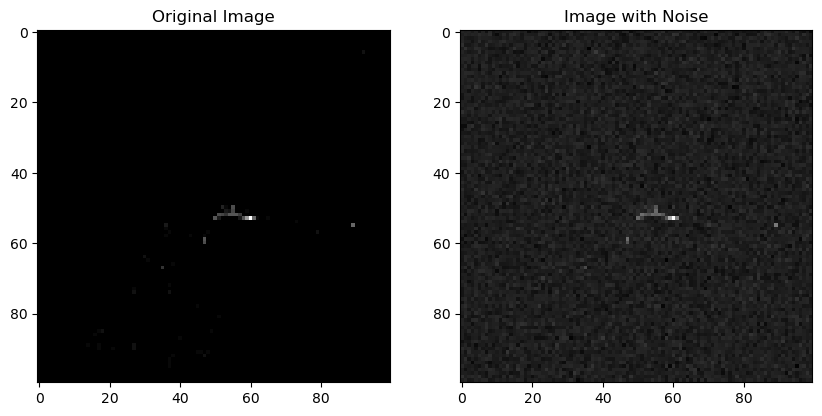

In [35]:
def add_noise(images, mean=0, std=1):
    
    """
    Function adding Gaussian noise to the images.

    Parameters:
    - images: original images
    - mean: mean of the Gaussian noise
    - std: standard deviation of the Gaussian noise

    Output:
    - noisy_images: images with added noise
    """
    
    # Generating Gaussian noise for each pixel in the images using the provided mean and standard deviation
    noise = np.random.normal(mean, std, images.shape)
    
    # Adding the generated noise to the original images
    noisy_images = (images + noise) / 255 
    
    # Outputting the images with added noise
    return noisy_images

# Adding noise to the images using the add_noise function
noisy_images = add_noise(images)

# Creating a figure with two side-by-side subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Displaying the original image in the first subplot
ax[0].imshow(images[0], cmap='gray')
ax[0].set_title('Original Image')

# Displaying the noisy image in the second subplot
ax[1].imshow(noisy_images[0], cmap='gray')
ax[1].set_title('Image with Noise')

# Showing the plot with both original and noisy images
plt.show()

# Task 2: Developing machine learning classifier


---
#### Steps to Develop ML Neutrino Classifier:
---

1. Data Preparation: Simulate or gather 'clean' neutrino images and 'empty' slices. Introduce varying levels of 'electronic noise'.

2. Data Labeling: Label 'clean' neutrinos as 1 and 'empty' slices as 0.

3. Data Splitting: Use train_test_split to partition data into training and testing sets.

4. Model Architecture: Design a Convolutional Neural Network (CNN) using libraries like TensorFlow/Keras. Include layers like Conv2D, MaxPooling2D, Flatten, Dense, and potentially Dropout for regularization.

5. Model Compilation: Use an optimizer like 'adam' and a binary loss function such as 'binary_crossentropy'.

6. Training: Train the model using the training data, specifying the number of epochs, batch size, and validation data.

7. Evaluation: Assess model performance on the test set to get accuracy and loss metrics.

8. Noise Robustness: Evaluate the model's performance across various noise levels to understand its robustness.

9. Visualization: Plot model accuracy and loss over epochs, and plot model accuracy against different noise levels.

---

In [87]:
# Importing the relevant Machine Learning packages
# TensorFlow and tf.keras

import tensorflow as tf 
from tensorflow import keras

### Simulating 'Electronic Noise'
---
We'll use the add_noise function to create noisy images. In the following code below we'll simulate 'clean' and 'noisy' images:

---

In [90]:
# Simulating clean images (these are your original images)
clean_images = images


# Simulating noisy images
mean_noise = 0
std_deviation = 5  # we start with a standard deviation of 5 (can adjust this value later)    

# Creating noisy pictures by adding Gaussian noise to clean images
noisy_images = add_noise(clean_images, mean_noise, std_deviation)

### Making labels for our data
---
We will mark clean_images with a 1 (which means there is a neutrino) and noisy_images with a 0 (which means there is no neutrino).

---

In [91]:
# Creating a list of labels for pictures that are clean
clean = np.ones(clean_images.shape[0]) # label 1 for neutrino events


# Creating a list of labels for pictures that are noisy
noisy = np.zeros(noisy_images.shape[0]) # label 0 for empty/noisy images

### Preparing our data for training

---
We are going to put all the data together and divide it into sets for training and testing.

---

In [92]:
# Importing the 'train_test_split' function from 'scikit-learn'
from sklearn.model_selection import train_test_split


# Adding clean and noisy pictures to a single array in a vertical direction
all_images = np.vstack([clean_images, noisy_images])


# Combining clean and noisy labels horizontally into a single array
all_labels = np.hstack([clean, noisy])


# Separate pictures and labels into sets for training and sets for testing
# Using the train_test_split method with a 20% test size and a random state to make it easy to reproduce
# Allocated 80% of the data for training and 20% for testing

X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

### Defining and training a classifier.
---
We are going to use Convolutional Neural Networks (CNN) as classifier as its very effective for image-based data

---

In [93]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

# Initializing the model
model = Sequential()

# Adding a Convolutional layer with 16 filters of size 3x3 and 'relu' activation
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 1)))

# Adding a MaxPooling layer of size 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the output for the Dense layers
model.add(Flatten())

# Adding a Dense layer with 64 neurons
model.add(Dense(64, activation='relu'))

# Adding a Dropout layer with a dropout rate of 0.3
model.add(Dropout(0.3))

# Outputting layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Reshaping the data to fit the CNN model:

In [94]:
# Reshaping training images for convolutional neural network (CNN) input
X_train_cnn = X_train.reshape(-1, 100, 100, 1)

# Reshaping testing images for convolutional neural network (CNN) input
X_test_cnn = X_test.reshape(-1, 100, 100, 1)

# Normalizing image data to values between 0 and 1
X_train_cnn = X_train_cnn.astype('float32') 
X_test_cnn = X_test_cnn.astype('float32')

### Training the model

In [95]:
# Training the CNN model using the training data, specifying epochs, batch size, and validation data

history = model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

Epoch 1/10
500/500 [==============================] - 10s 20ms/step - loss: 0.0128 - accuracy: 0.9971 - val_loss: 0.0050 - val_accuracy: 0.9998
Epoch 2/10
500/500 [==============================] - 10s 20ms/step - loss: 8.8590e-05 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 0.9998
Epoch 3/10
500/500 [==============================] - 9s 19ms/step - loss: 1.9622e-05 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 0.9998
Epoch 4/10
500/500 [==============================] - 10s 19ms/step - loss: 5.7943e-06 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 0.9998
Epoch 5/10
500/500 [==============================] - 10s 20ms/step - loss: 5.1931e-06 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 0.9998
Epoch 6/10
500/500 [==============================] - 10s 20ms/step - loss: 7.9344e-06 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 0.9998
Epoch 7/10
500/500 [==============================] - 11s 22ms/step - loss: 2.4604e-06 - accuracy: 1.0000 - val_loss:

### Evaluating the model

Test loss: 0.006822546478360891
Test accuracy: 0.999750018119812


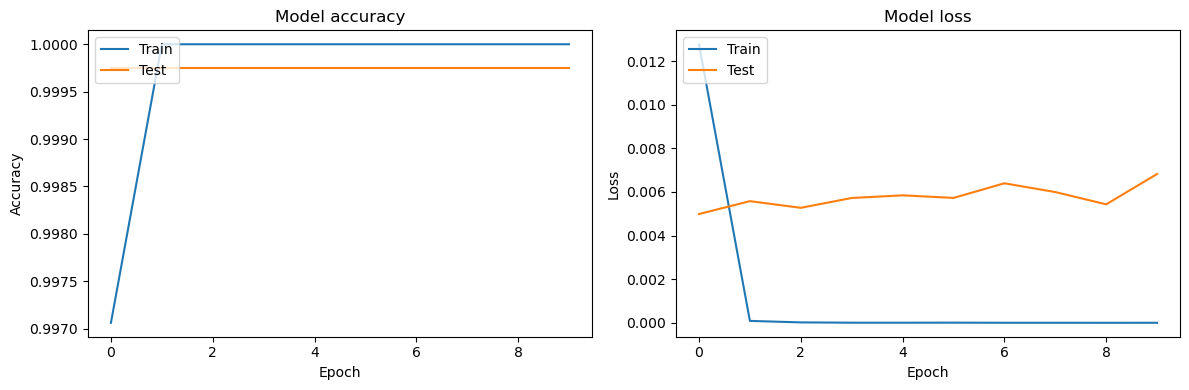

In [96]:
# Evaluating the trained CNN model on the test dataset
score = model.evaluate(X_test_cnn, y_test, verbose=0)

# Displaying the loss and accuracy achieved on the test dataset
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Initializing a figure to visualize training and testing accuracy & loss
plt.figure(figsize=(12, 4))

# Subplot for accuracy values
plt.subplot(1, 2, 1)

# Ploting accuracy values for both training and test datasets
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Title and labels for the accuracy plot
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# Adding legend to differentiate between training and test accuracy
plt.legend(['Train', 'Test'], loc='upper left')

# Subplot for loss values
plt.subplot(1, 2, 2)

# Plotting loss values for both training and test datasets
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Title and labels for the loss plot
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# Adding legend to differentiate between training and test loss
plt.legend(['Train', 'Test'], loc='upper left')

# Adjusting the space between plots
plt.tight_layout()

# Displaying the plots
plt.show()

### Noise Sensitivity Analysis
---
Generating Data with Varying Noise Levels

---

Noise Level: 0, Test Loss: 3.4952049255371094, Test Accuracy: 0.49524998664855957
Noise Level: 0.1, Test Loss: 3.2979118824005127, Test Accuracy: 0.49524998664855957
Noise Level: 0.3, Test Loss: 2.907119035720825, Test Accuracy: 0.49524998664855957
Noise Level: 0.4, Test Loss: 2.7132389545440674, Test Accuracy: 0.49524998664855957
Noise Level: 0.5, Test Loss: 2.526012897491455, Test Accuracy: 0.49524998664855957
Noise Level: 0.6, Test Loss: 2.3428804874420166, Test Accuracy: 0.49524998664855957


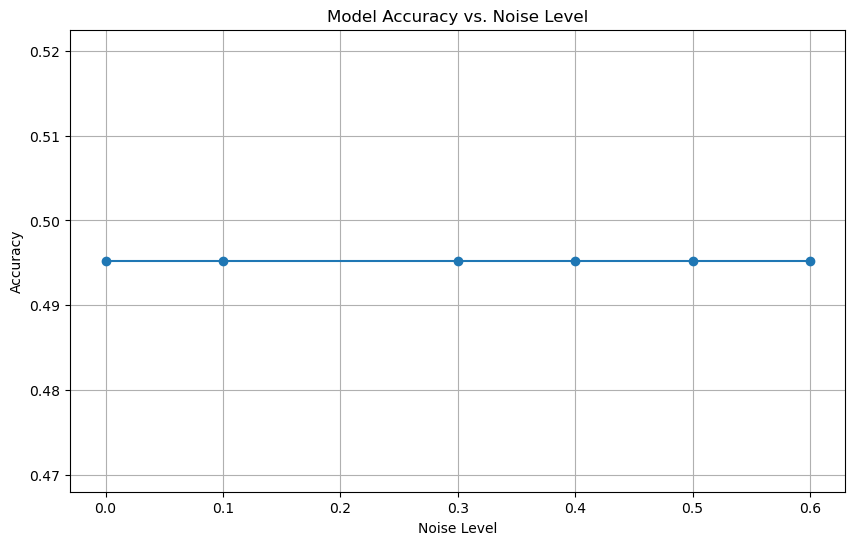

In [103]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Defining a list of desired noise levels for the analysis
noise_levels = [0, 0.1, 0.3, 0.4, 0.5, 0.6]

# Creating a dictionary to store datasets with different noise levels
noisy_data_sets = {}

# Looping through each noise level, add noise to the test data, and store it in the dictionary
for level in noise_levels:
    
    # Generating noisy data by adding noise to the test set
    noisy_data = add_noise(X_test, level)
    
    # Storing the noisy data in the dictionary with the current noise level as the key
    noisy_data_sets[level] = noisy_data
    

# Dictionary to store the performance results for each noise level
results = {}

# Looping through each noisy dataset to evaluate the model's performance
for level, data in noisy_data_sets.items():
    
    # Reshaping the noisy data for the CNN input
    data_cnn = data.reshape(-1, 100, 100, 1)
    data_cnn = data_cnn.astype('float32')
    
    # Evaluate the model on the current noisy dataset
    score = model.evaluate(data_cnn, y_test, verbose=0)
    
    # Storing the test loss and accuracy in the results dictionary for the current noise level
    results[level] = {'Test Loss': score[0], 'Test Accuracy': score[1]}
    
    # Printing out the performance metrics for the current noise level
    print(f"Noise Level: {level}, Test Loss: {score[0]}, Test Accuracy: {score[1]}")

# Extracting noise levels and corresponding accuracies from the results
noise_levels_list = list(results.keys())
accuracies = [entry['Test Accuracy'] for entry in results.values()]

# Setting up the plot
plt.figure(figsize=(10,6))

# Plotting accuracy against noise level
plt.plot(noise_levels_list, accuracies, marker='o')

# Adding title and labels to the plot for clarity
plt.title('Model Accuracy vs. Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')

# Displaying a grid on the plot for better visualization
plt.grid(True)

# Show the plot
plt.show()

# Task 3: Testing the machine learning classifier on simulated neutrinos overlaid with noise

In [104]:
#### Evaluating Classifier on Different Noise Levels #####

# List of noise levels to test
noise_levels = [0.05 * i for i in range(11)]  # 0, 0.05, 0.1, ... , 0.5

# Storing results for each noise level
results = {}

# Iterating over noise levels
for level in noise_levels:
    
    # Overlaying noise on test data
    noisy_data = add_noise(X_test_cnn, level)
    
    # Evaluating the model
    score = model.evaluate(noisy_data, y_test, verbose=0)
    
    # Save results
    results[level] = {'Test Loss': score[0], 'Test Accuracy': score[1]}
    
    # Print the results for this noise level for verification
    print(f"Noise Level: {level}, Test Loss: {score[0]}, Test Accuracy: {score[1]}")

#### Determining Impact #####

# Using the accuracy of the model on non-noisy data as the baseline
baseline_accuracy = results[0]['Test Accuracy']

# Defining a threshold for noticeable decline
threshold = 0.02

impact_level = None

# Looping through the results
for level, metrics in results.items():
    print(f"Checking Noise Level {level}: Current Accuracy = {metrics['Test Accuracy']}, Target = {baseline_accuracy - threshold}")
    if metrics['Test Accuracy'] < baseline_accuracy - threshold:
        impact_level = level
        break

# Outputting the result

if impact_level:
    print(f"The additional noise starts to impact the classifier noticeably at a noise level of {impact_level}.")
else:
    print("The classifier's performance was not noticeably impacted by the tested noise levels.")

Noise Level: 0.0, Test Loss: 3.4953436851501465, Test Accuracy: 0.49524998664855957
Noise Level: 0.05, Test Loss: 3.3966875076293945, Test Accuracy: 0.49524998664855957
Noise Level: 0.1, Test Loss: 3.2974343299865723, Test Accuracy: 0.49524998664855957
Noise Level: 0.15000000000000002, Test Loss: 3.197929620742798, Test Accuracy: 0.49524998664855957
Noise Level: 0.2, Test Loss: 3.1011009216308594, Test Accuracy: 0.49524998664855957
Noise Level: 0.25, Test Loss: 3.0029900074005127, Test Accuracy: 0.49524998664855957
Noise Level: 0.30000000000000004, Test Loss: 2.9049739837646484, Test Accuracy: 0.49524998664855957
Noise Level: 0.35000000000000003, Test Loss: 2.8097541332244873, Test Accuracy: 0.49524998664855957
Noise Level: 0.4, Test Loss: 2.7143120765686035, Test Accuracy: 0.49524998664855957
Noise Level: 0.45, Test Loss: 2.6191623210906982, Test Accuracy: 0.49524998664855957
Noise Level: 0.5, Test Loss: 2.5245323181152344, Test Accuracy: 0.49524998664855957
Checking Noise Level 0.0: 

In [105]:
## Overlaying Simulated Neutrinos with Noise 
## and checking how well the machine learning classifier works on test data with different amounts of noise 

# List of noise levels to test, ranging from 0 to 0.5 in increments of 0.05
noise_levels = [0.05 * i for i in range(11)]

# Dictionary to store the evaluation results for each noise level
results = {}

# Iterating over each noise level to evaluate model performance
for level in noise_levels:
    
    # Applying noise to the test data based on the current noise level
    noisy_data = add_noise(X_test_cnn, level)
     
    # Evaluating the performance of the model on the noisy data
    score = model.evaluate(noisy_data, y_test, verbose=0)
    
    # Storing the performance metrics (loss and accuracy) for the current noise level in the results dictionary
    results[level] = {'Test Loss': score[0], 'Test Accuracy': score[1]}
    
    # Printing the performance metrics for the current noise level
    print(f"Noise Level: {level}, Test Loss: {score[0]}, Test Accuracy: {score[1]}")

Noise Level: 0.0, Test Loss: 3.4946448802948, Test Accuracy: 0.49524998664855957
Noise Level: 0.05, Test Loss: 3.3957626819610596, Test Accuracy: 0.49524998664855957
Noise Level: 0.1, Test Loss: 3.298797607421875, Test Accuracy: 0.49524998664855957
Noise Level: 0.15000000000000002, Test Loss: 3.199544668197632, Test Accuracy: 0.49524998664855957
Noise Level: 0.2, Test Loss: 3.102553606033325, Test Accuracy: 0.49524998664855957
Noise Level: 0.25, Test Loss: 3.004401922225952, Test Accuracy: 0.49524998664855957
Noise Level: 0.30000000000000004, Test Loss: 2.9062769412994385, Test Accuracy: 0.49524998664855957
Noise Level: 0.35000000000000003, Test Loss: 2.809835195541382, Test Accuracy: 0.49524998664855957
Noise Level: 0.4, Test Loss: 2.713932514190674, Test Accuracy: 0.49524998664855957
Noise Level: 0.45, Test Loss: 2.6181490421295166, Test Accuracy: 0.49524998664855957
Noise Level: 0.5, Test Loss: 2.525136709213257, Test Accuracy: 0.49524998664855957


In [106]:
#### Determining Impact #####

# Using the accuracy of the model on non-noisy data as the baseline.
baseline_accuracy = results[0]['Test Accuracy']

# Defining a threshold for what we consider a "noticeable decline" in accuracy.
# In this example, I think a 2% decline from the baseline accuracy is considered noticeable.
threshold = 0.02

impact_level = None  # Initialize the impact level to None.

# Looping through the results to check where the performance drops by more than the threshold.
for level, metrics in results.items():
    if metrics['Test Accuracy'] < baseline_accuracy - threshold:
        impact_level = level
        break  # Exit the loop once the impact level is found.

# If an impact level was found, print it. Otherwise, state that there was no noticeable impact.
if impact_level:
    print(f"The additional noise starts to impact the classifier noticeably at a noise level of {impact_level}.")
else:
    print("The classifier's performance was not noticeably impacted by the tested noise levels.")


The classifier's performance was not noticeably impacted by the tested noise levels.
